# Tweet classification: Trump vs. Trudeau

# 1. Import the libraries

- Note : use a specific random state for your solution.

In [6]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
%matplotlib inline

# 2. Read the dataset

In [7]:
df = pd.read_csv('tweets.csv')
df.head()

,id,author,status
0,1,Donald J. Trump,I will be making a major statement from the @W...
1,2,Donald J. Trump,Just arrived at #ASEAN50 in the Philippines fo...
2,3,Donald J. Trump,"After my tour of Asia, all Countries dealing w..."
3,4,Donald J. Trump,Great to see @RandPaul looking well and back o...
4,5,Donald J. Trump,Excited to be heading home to see the House pa...


# 3. Split the dataset into X and y

In [8]:
x=df["status"]
y=df["author"]

# 4. Split the dataset into training set and testing set

In [9]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test =train_test_split(x , y , test_size=0.25, random_state=30)


# 5. Vectorize the tweets

- Note : Read about CountVectorizer and TfidfVectorizer methods and use them in training and testing dataset.

In [10]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer


In [11]:
countVectorizer = CountVectorizer()
tfidfVectorizer = TfidfVectorizer()

In [12]:
xtaincount= countVectorizer.fit_transform(x_train)
xtraintfidf= tfidfVectorizer.fit_transform(x_train)

In [13]:
xtestcount= countVectorizer.transform(x_test)
xtesttfidf= tfidfVectorizer.transform(x_test)

# 6. Train a Logistic Regression model

- Build and train two models, the first by using the tfidf data, and the second by using count vectorize data.

In [14]:
from sklearn.linear_model import LogisticRegression


In [15]:
Logisticcount=LogisticRegression()
Logistictfidf=LogisticRegression()

In [16]:
Logisticcount.fit(xtaincount , y_train)
Logistictfidf.fit(xtraintfidf , y_train)

LogisticRegression()

# 7. Train a SVM model

- Build and train two models, the first by using the tfidf data, and the second by using count vectorize data.

In [17]:
from sklearn.svm import SVC

In [18]:
svmCount = SVC()
svmtfidf = SVC()

In [19]:
svmCount.fit( xtaincount, y_train)
svmtfidf.fit( xtraintfidf, y_train)

SVC()

# 8. Make a prediction and calculate the score for both Logistic Regression and SVM

In [20]:
Logisticcountprediction = Logisticcount.predict(xtestcount)
Logistictfidfprediction = Logistictfidf.predict(xtesttfidf)

In [21]:
# Logistic Regression prediction score
LogisticCountScore = accuracy_score(y_test, Logisticcountprediction)
LogistictfidfScore = accuracy_score(y_test, Logistictfidfprediction)

print("Logistic Regression  count Score " , LogisticCountScore)
print("Logistic Regression  Tfidf Score " , LogistictfidfScore)

Logistic Regression  count Score  0.87
Logistic Regression  Tfidf Score  0.9


In [22]:
# SVM  prediction Score 

svmcountpreduction = svmCount.predict(xtestcount)
svmtfidfprediction = svmtfidf.predict(xtesttfidf)

In [23]:
svmCountScore = accuracy_score(y_test, svmcountpreduction)
svmtfidfScore = accuracy_score(y_test, svmtfidfprediction)

print("SVM  count Score   " , svmCountScore)
print("SVM  Tfidf Score  " , svmtfidfScore)

SVM  count Score    0.84
SVM  Tfidf Score   0.9


# 9. Plot a confusion matrix for both Logistic Regression and SVM

In [24]:
LRC = confusion_matrix(y_test , Logisticcountprediction)
LRF = confusion_matrix( y_test , Logistictfidfprediction)

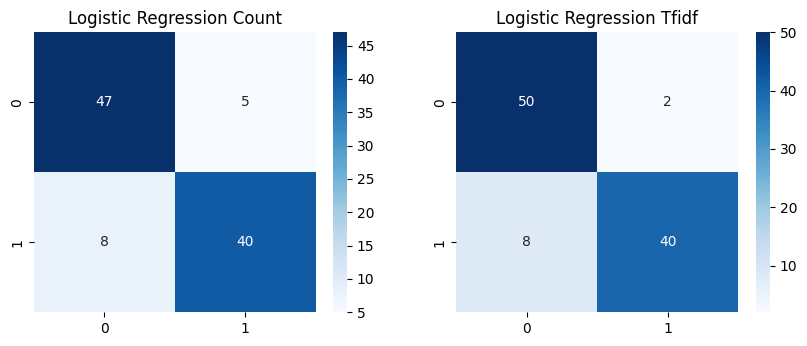

In [25]:
#Logistic Regression
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1 ,)
sns.heatmap(LRC, annot = True , cmap = 'Blues')
plt.title('Logistic Regression Count')

plt.subplot(2, 2, 2)
sns.heatmap(LRF, annot=True, cmap = 'Blues')
plt.title('Logistic Regression Tfidf')


plt.show()



In [26]:
SVMCOUNT = confusion_matrix(y_test ,svmcountpreduction)
svmtfidf= confusion_matrix( y_test , svmtfidfprediction)

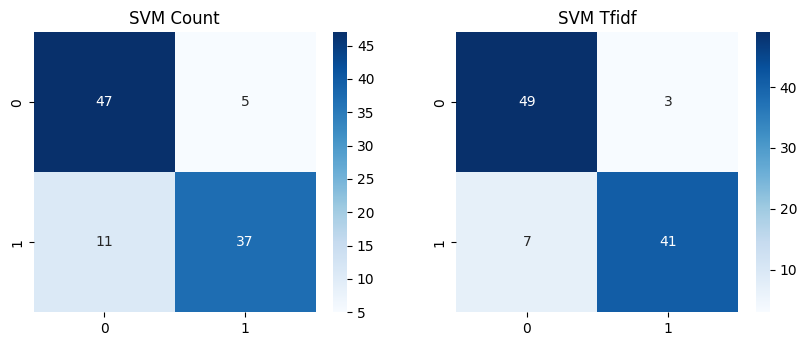

In [28]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
sns.heatmap(SVMCOUNT, annot = True ,cmap = 'Blues')
plt.title('SVM Count')

plt.subplot(2, 2, 2)
sns.heatmap(svmtfidf, annot=True, cmap = 'Blues')
plt.title('SVM Tfidf')


plt.show()